# **Import necessary labraries**

In [1]:
#Pandas là một thư viện mạnh mẽ trong Python dùng để thao tác và phân tích dữ liệu.
import pandas as pd
#NumPy là thư viện hỗ trợ tính toán khoa học với các phép toán trên mảng và ma trận.
import numpy as np
#Matplotlib là thư viện dùng để tạo các biểu đồ và đồ thị trực quan từ dữ liệu.
import matplotlib.pyplot as plt
#Seaborn là một thư viện được xây dựng trên nền tảng Matplotlib, cung cấp các công cụ trực quan hóa nâng cao hơn.
import seaborn as sns

# **Load the data from the CSV file**

In [ ]:
#Khai báo thư viện
from google.colab import files

In [ ]:
#Upload file CSV lên
upload = files.upload()
filename = next(iter(upload))

Saving WA_Fn-UseC_-Telco-Customer-Churn (1).csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [ ]:
#Đọc file
df = pd.read_csv(filename);
df #in ra hết dòng

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Đổi lại cho nó đồng bộ
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#Xóa cột CustomID vì nó không cần thiết
df = df.drop(['customerID'], axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#Phải chuyển từ String sang Numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#Here we see that the TotalCharges has 11 missing values. Let's check this data.
#np.isnan() là một hàm của NumPy, kiểm tra xem mỗi giá trị trong cột TotalCharges có phải là NaN hay không.
#Ở đây, điều kiện là np.isnan(df['TotalCharges']), chỉ trả về các hàng trong df mà TotalCharges có giá trị là NaN.
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


# **Calculate basic statistics**

In [ ]:
# Tính toán các thống kê cơ bản
#Tính trung bình cộng của tất cả các giá trị trong cột TotalCharges.
mean_total_charges = df['TotalCharges'].mean()
#Tính trung vị, là giá trị chính giữa của TotalCharges khi sắp xếp các giá trị theo thứ tự tăng dần.
median_total_charges = df['TotalCharges'].median()
#Tìm mốt – giá trị xuất hiện nhiều nhất trong cột TotalCharges.
#[0] được dùng để lấy giá trị đầu tiên của mốt, vì mode() trả về một Series (nếu có nhiều mốt, chỉ lấy giá trị đầu tiên).
mode_total_charges = df['TotalCharges'].mode()[0]
#Lấy giá trị lớn nhất và data['TotalCharges'].min() lấy giá trị nhỏ nhất trong cột TotalCharges.
range_total_charges = df['TotalCharges'].max() - df['TotalCharges'].min()
#Tính phương sai của TotalCharges, cho biết mức độ phân tán của các giá trị so với giá trị trung bình.
#Phương sai càng cao thì các giá trị càng phân tán nhiều xung quanh trung bình.
variance_total_charges = df['TotalCharges'].var()
# Tính độ lệch chuẩn, là căn bậc hai của phương sai.
std_dev_total_charges = df['TotalCharges'].std()
#In tất cả kết quả
print("Mean:", mean_total_charges)
print("Median:", median_total_charges)
print("Mode:", mode_total_charges)
print("Range:", range_total_charges)
print("Variance:", variance_total_charges)
print("Standard Deviation:", std_dev_total_charges)

Mean: 2283.3004408418656
Median: 1397.475
Mode: 20.2
Range: 8666.0
Variance: 5138252.40705357
Standard Deviation: 2266.7713618831453


# **Biểu đồ hình chữ nhật cho TotalCharges**

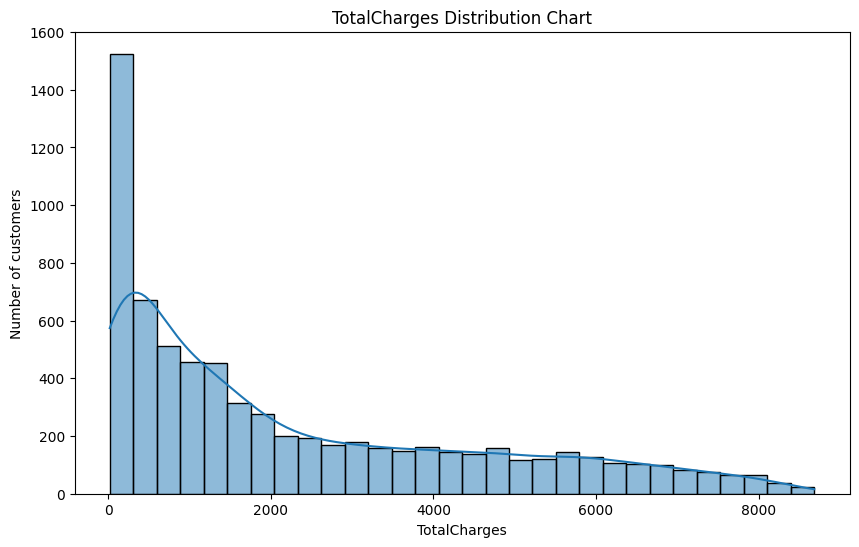

In [ ]:
#thiết lập kích thước của biểu đồ với chiều rộng là 10 đơn vị và chiều cao là 6 đơn vị.
plt.figure(figsize=(10, 6))
#sns.histplot() là hàm của Seaborn dùng để vẽ biểu đồ phân phối (histogram) cho dữ liệu số.
#df['TotalCharges'] là dữ liệu cần vẽ biểu đồ, ở đây là cột TotalCharges trong DataFrame df.
#bins=30 chia dữ liệu thành 30 nhóm (bins), điều chỉnh độ mịn của biểu đồ.
#kde=True thêm đường mật độ (Kernel Density Estimation) lên biểu đồ, giúp thấy rõ hơn hình dạng phân phối của dữ liệu.
sns.histplot(df['TotalCharges'], bins=30, kde=True)
#plt.title('TotalCharges Distribution Chart') đặt tiêu đề cho biểu đồ là “TotalCharges Distribution Chart”.
plt.title('TotalCharges Distribution Chart')
#plt.xlabel('TotalCharges') đặt nhãn trục x là "TotalCharges", biểu diễn trục dữ liệu chi phí.
plt.xlabel('TotalCharges')
#plt.ylabel('Number of customers') đặt nhãn trục y là "Number of customers", biểu diễn số lượng khách hàng ở mỗi mức TotalCharges.
plt.ylabel('Number of customers')
#plt.show() hiển thị biểu đồ trên màn hình.
plt.show()

# **Biểu đồ hộp cho TotalCharges và MonthlyCharges**

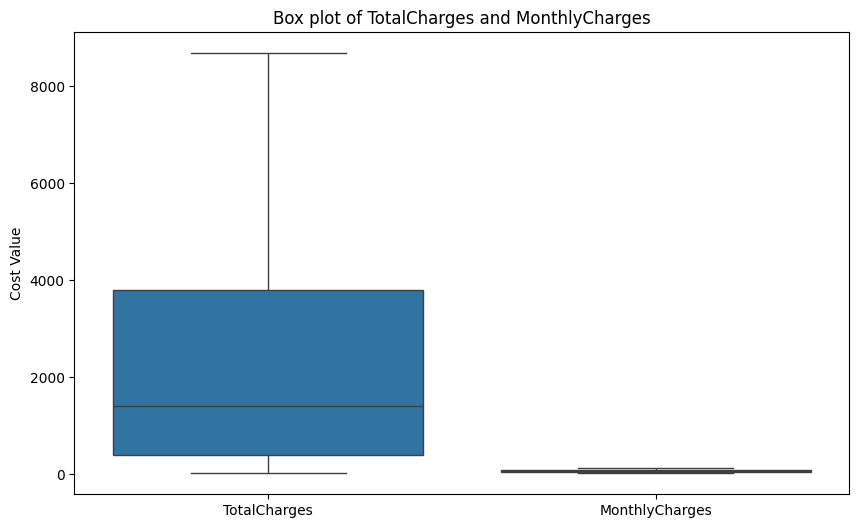

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['TotalCharges', 'MonthlyCharges']])
plt.title('Box plot of TotalCharges and MonthlyCharges')
plt.ylabel('Cost Value')
plt.show()

# **Biểu đồ phân tán giữa MonthlyCharges và TotalCharges**

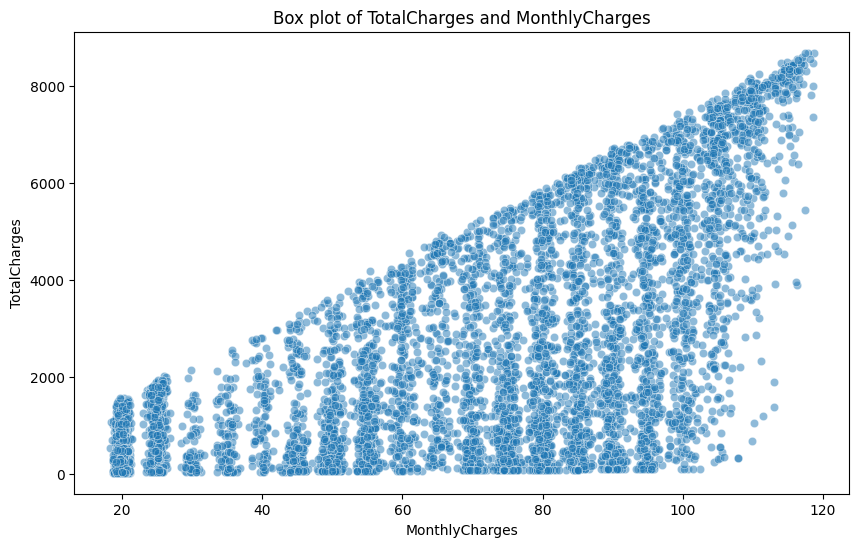

In [ ]:
plt.figure(figsize=(10, 6))
#alpha=0.5 thiết lập độ trong suốt cho các điểm dữ liệu, với alpha ở mức 0.5, giúp giảm bớt sự chồng chéo nếu có nhiều điểm ở cùng vị trí.
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', alpha=0.5)
plt.title('Box plot of TotalCharges and MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()

# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder from sklearn.preprocessing
#Đây là phần khai báo hàm object_to_int, nhận đầu vào là một dataframe_series (chuỗi dữ liệu hoặc cột trong DataFrame).
#dataframe_series là một cột cụ thể từ DataFrame mà bạn muốn kiểm tra và chuyển đổi.
def object_to_int(dataframe_series):
#Nếu dataframe_series có kiểu dữ liệu là object (thường là chuỗi), câu lệnh này sẽ thực hiện hành động chuyển đổi ở bước tiếp theo. Nếu không, nó sẽ bỏ qua và trả về cột dữ liệu gốc.
    if dataframe_series.dtype=='object':
#Dòng này sử dụng LabelEncoder từ thư viện sklearn.preprocessing để chuyển đổi các giá trị chuỗi thành các số nguyên.
#LabelEncoder sẽ gán một số nguyên duy nhất cho mỗi giá trị khác nhau trong dataframe_series.
#Ví dụ: Nếu dataframe_series chứa các giá trị ['apple', 'banana', 'apple'], thì sau khi mã hóa, nó sẽ trở thành [0, 1, 0].
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
#Sau khi thực hiện chuyển đổi, hàm trả về dataframe_series, có thể đã được chuyển đổi thành các số nguyên nếu đó là dữ liệu object.
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
#Tạo một hình (figure) mới để chứa đồ thị.
plt.figure(figsize=(14,7))
#Tính toán ma trận tương quan giữa tất cả các biến trong DataFrame df
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
MultipleLines,0.038037
PhoneService,0.011942
gender,-0.008612
StreamingTV,-0.036581
StreamingMovies,-0.038492


<Figure size 1400x700 with 0 Axes>

In [ ]:
#Tạo biến X chứa tất cả các cột trong DataFrame df, ngoại trừ cột Churn.
X = df.drop(columns = ['Churn'])
#Tạo biến y chứa giá trị của cột Churn, được sử dụng làm biến phụ thuộc (target variable) cho mô hình.
y = df['Churn'].values

In [ ]:
#Import the necessary library
from sklearn.model_selection import train_test_split

# Existing code remains the same
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

<ipython-input-104-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-104-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-104-8c8257b32bab>:4: UserWarning: 

`distplot` 

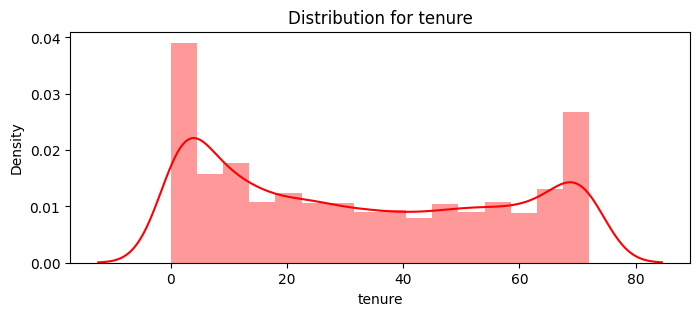

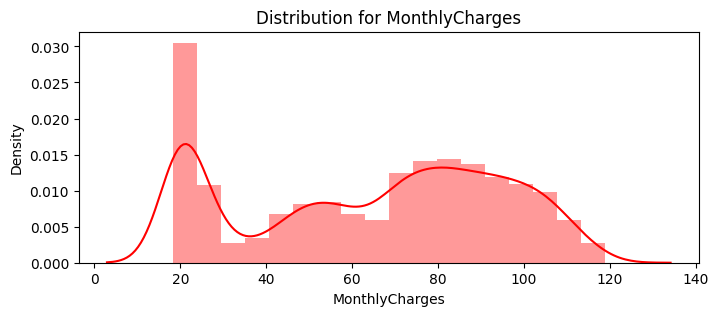

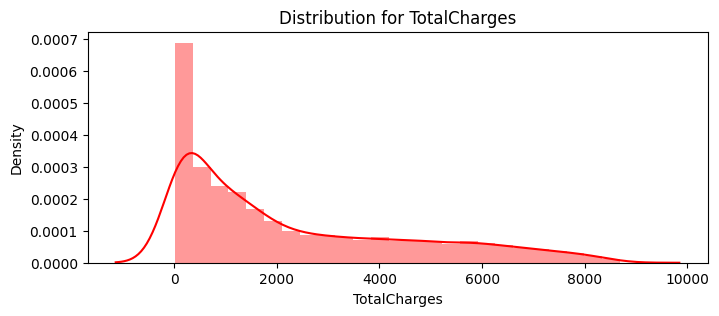

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

# **Standardizing numeric attributes - Chuẩn hóa các thuộc tính số**

<ipython-input-104-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-104-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-104-8c8257b32bab>:4: UserWarning: 

`distplot` 

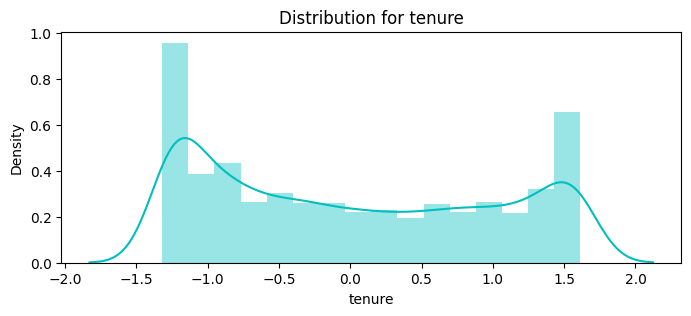

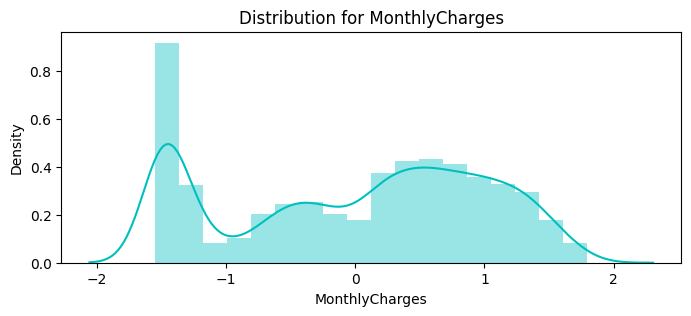

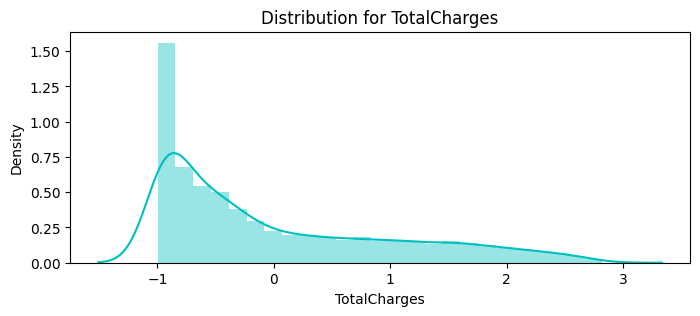

In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# **Linear Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [ ]:
# If y_train is not a pandas Series and is a numpy array
y_train = np.nan_to_num(y_train)

In [ ]:
# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

# Now apply StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# Khởi tạo và huấn luyện mô hình
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Dự đoán và đánh giá
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

In [ ]:
# Before calculating R^2 for the test set, handle NaN values in y_test:
y_test = np.nan_to_num(y_test)

In [ ]:
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))

Train R^2: 0.27617955074959233
Test R^2: 0.27307980225261264
Mean Squared Error: 0.14175628401225535


# **Logistic Regression Model**

In [ ]:
# Import các thư viện cần thiết

#Dòng này nhập lớp LogisticRegression từ thư viện sklearn.linear_model.
#LogisticRegression là một mô hình học máy được sử dụng để phân loại nhị phân hoặc đa lớp, sử dụng hàm hồi quy logistic để dự đoán xác suất của các lớp.
from sklearn.linear_model import LogisticRegression
#Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test).
from sklearn.model_selection import train_test_split
#Đánh giá độ chính xác của mô hình.
from sklearn.metrics import accuracy_score

In [ ]:
# Bước 1: Khởi tạo và huấn luyện mô hình Logistic Regression
#Khởi tạo mô hình Logistic Regression
lr_model = LogisticRegression()
#Huấn luyện mô hình
lr_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Bước 2: Tính toán độ chính xác của mô hình

#lr_model.score(X_test, y_test) tính toán độ chính xác của mô hình lr_model trên dữ liệu kiểm tra (X_test và y_test)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7936583057264552


In [ ]:
# Bước 3: Dự đoán và tạo báo cáo đánh giá

#lr_model.predict(X_test) sử dụng mô hình lr_model đã được huấn luyện để dự đoán nhãn (y) cho dữ liệu trong X_test.
lr_pred= lr_model.predict(X_test)
#classification_report(y_test, lr_pred) tạo ra một báo cáo đánh giá về các chỉ số hiệu suất của mô hình, so sánh nhãn thực (y_test) với nhãn dự đoán (lr_pred).
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



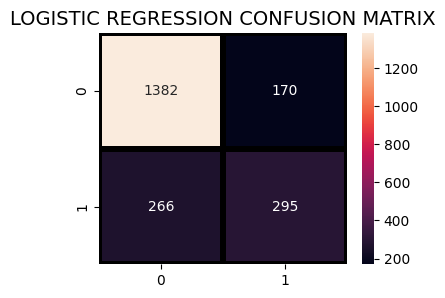

In [ ]:
# Bước 4: Vẽ ma trận nhầm lẫn (Confusion Matrix)

#plt.figure(figsize=(4,3)) thiết lập kích thước của biểu đồ (rộng 4 đơn vị và cao 3 đơn vị).
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
#plt.title(...) thêm tiêu đề "LOGISTIC REGRESSION CONFUSION MATRIX" với cỡ chữ là 14 để mô tả loại biểu đồ.
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

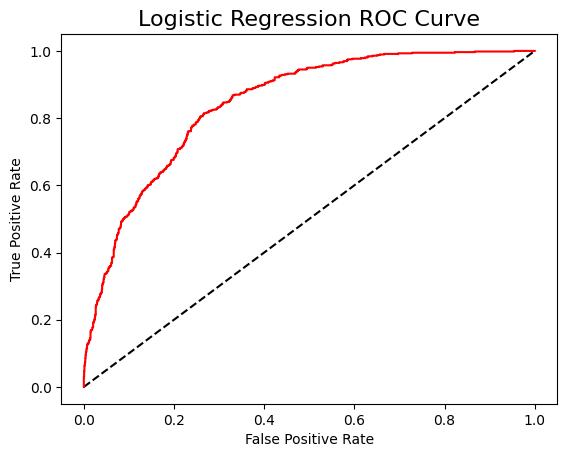

In [ ]:
# Vẽ đường cong ROC cho từng lớp
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();